In [69]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## About the DataSet


The healthcare sector has long been an early adopter of and benefited greatly from technological advances. These days, machine learning plays a key role in many health-related realms, including the development of new medical procedures, the handling of patient data, health camps and records and the treatment of chronic diseases. 


This weekend we invite you to participate in another Janatahack with the theme of healthcare management analytics. Stay tuned for the problem statement and datasets this Friday and get a chance to work on a real healthcare case study along with 150 AV points at stake.

## Problem Statements


Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for **working professionals** better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.



MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, **MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp).** 



MedCamp has conducted 65 such events over a period of 4 years and they see a **high drop off between “Registration” and Number of people taking tests at the Camps.** In last 4 years, they have stored data of ~110,000 registrations they have done.



One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

 

**The Process:**

   * MedCamp employees / volunteers reach out to people and drive registrations.
   * During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health     camp.
 
 

**Other things to note:**

* Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.


* For a few camps, there was hardware failure, so some information about date and time of registration is lost.


* MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.



**Favorable outcome:**

* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.


* You need to predict the chances (probability) of having a favourable outcome.

In [70]:
train = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train\Train.csv")
test = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\test_Day2.csv")
submission = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\sample_submmission.csv")

In [71]:
pd.set_option("display.max_columns",100)
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [72]:
# Import the Additional Files for the Dataset

fhc = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train\First_Health_Camp_Attended.csv")
shc = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train\Second_Health_Camp_Attended.csv")
thc = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train\Third_Health_Camp_Attended.csv")
hc = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train\Health_Camp_Detail.csv")
pp = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train\Patient_Profile.csv")

In [73]:
fhc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',
       'Unnamed: 4'],
      dtype='object')

In [74]:
shc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Health Score'], dtype='object')

In [75]:
thc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')

In [76]:
pp.columns

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')

In [77]:
hc.columns

Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
       'Category2', 'Category3'],
      dtype='object')

In [78]:
# Lets combine the train and test Data

combined = pd.concat([train, test], ignore_index = True)

In [79]:
combined.shape, train.shape, test.shape

((110527, 8), (75278, 8), (35249, 8))

In [80]:
75278+35249

110527

In [81]:
# Lets join the patient profile to the combined dataset
combined = pd.merge(combined, pp, on = ['Patient_ID'],how = 'left')

In [82]:
pp.shape

(37633, 11)

In [83]:
# Combine the health camp with the dataset
combined = pd.merge(combined, fhc, on = ['Patient_ID','Health_Camp_ID'], how = 'left')

combined = pd.merge(combined, shc, on = ['Patient_ID','Health_Camp_ID'], how = 'left')

combined = pd.merge(combined, thc, on = ['Patient_ID','Health_Camp_ID'], how = 'left')

In [84]:
combined.shape, fhc.shape, shc.shape, thc.shape

((110527, 24), (6218, 5), (7819, 3), (6515, 4))

In [85]:
# Healthcare detail
combined = pd.merge(combined, hc, on = ['Health_Camp_ID'], how = 'left')

In [86]:
del pp, fhc, shc, hc

In [87]:
# Lets preview the Data
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [88]:
combined['Social_Media'] = combined.Online_Follower+combined.LinkedIn_Shared+combined.Twitter_Shared+combined.Facebook_Shared

In [89]:
# Registration_Date

combined['Registration_Date'] = pd.to_datetime(combined.Registration_Date, dayfirst=True)

combined['First_Interaction'] = pd.to_datetime(combined.First_Interaction, dayfirst=True)

combined['Camp_Start_Date'] = pd.to_datetime(combined.Camp_Start_Date, dayfirst=True)

combined['Camp_End_Date'] = pd.to_datetime(combined.Camp_End_Date, dayfirst=True)

In [90]:
# Diff_Int_Days

combined['Interaction_Days'] = combined['Registration_Date']-combined['First_Interaction']

In [91]:
# Remove days from the variable created above

combined['Interaction_Days'] = combined.Interaction_Days.dt.days

In [92]:
# Camp_Duration

combined['Camp_Duration'] = (combined['Camp_End_Date']-combined['Camp_Start_Date']).dt.days

In [93]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4


In [94]:
# Camp Start Date - Registration_Date

combined['magic1'] = np.abs((combined['Camp_Start_Date']-combined['Registration_Date']).dt.days)

In [95]:
# Camp End Date - Registration_Date

combined['magic2'] = np.abs((combined['Camp_End_Date']-combined['Registration_Date']).dt.days)

In [96]:
# Patient Duration

combined['Patient_Duration'] = np.abs((combined['Camp_End_Date']-combined['First_Interaction']).dt.days)

In [97]:
# First Interaction >> Registration Date >> Camp is Org>>
# Person Comes >> Health Camp >> health score else stall visit....

# First Interaction Date >> Registration Date >> Camp date
# Camp End Date >> Camp Start Date >> Registration Date

def dates_between(start, reg, end):
    if(end>start>reg):
        return 1
    else:
        return 0

In [98]:
# Lets apply the function

combined['dates_seq'] = combined.apply(lambda x:dates_between(x['Camp_Start_Date'], 
                                                              x['Registration_Date'], 
                                                              x['Camp_End_Date']),axis=1)

In [99]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1


In [100]:
combined["Registration_Days"]=combined.Registration_Date.dt.day
combined["Registration_Month"]=combined.Registration_Date.dt.month
combined["Registration_Year"]=combined.Registration_Date.dt.year

In [101]:
# Camp Start Date and End Date 

combined['Camp_Start_Date'] = combined.Camp_Start_Date.dt.year
combined['Camp_End_Year'] = combined.Camp_End_Date.dt.year
combined['First_Int_Year'] = combined.First_Interaction.dt.year

In [102]:
# No of Patients per day 
combined['Patients_Per_Day'] = combined.groupby('Registration_Days')['Patient_ID'].transform('nunique')

In [103]:
# No of Patients per month 
combined['Patients_Per_Month'] = combined.groupby('Registration_Month')['Patient_ID'].transform('nunique')

In [104]:
# No of Patients per year
combined['Patients_Per_Year'] = combined.groupby('Registration_Year')['Patient_ID'].transform('nunique')

<AxesSubplot:xlabel='Patients_Per_Year', ylabel='count'>

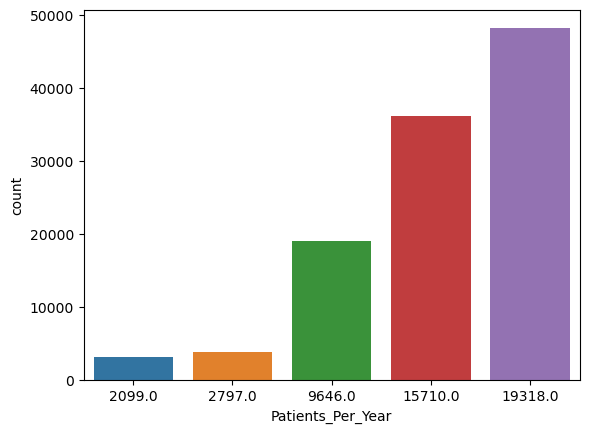

In [105]:
sns.countplot(combined.Patients_Per_Year)

In [106]:
# Frequency of Patient ID 

combined['Patient_Frequency_Per_Day'] = combined.groupby('Patient_ID')['Registration_Days'].transform('nunique')
combined['Patient_Frequency_Per_Day'] = combined.groupby('Patient_ID')['Registration_Month'].transform('nunique')
combined['Patient_Frequency_Per_Day'] = combined.groupby('Patient_ID')['Registration_Year'].transform('nunique')

In [107]:
# No Patients in Health Camps
combined['Patient_Freq_HC'] = combined.groupby('Health_Camp_ID')['Patient_ID'].transform('nunique')

In [108]:
# No of Health Camps 
combined['Health_Camps_Year'] = combined.groupby('Camp_End_Year')['Health_Camp_ID'].transform('nunique')

In [109]:
# If the health Score >0 or health_score >0 or Num of stall visited >0 
# Return 1 else 0


def tgt(hs, hs_, stall_visit, stall_no):
    if((hs>0) or (hs_>0) or (stall_visit>0) or (stall_no>0)):
        return(1)
    else:
        return(0)

In [110]:
combined['Target'] = combined.apply(lambda x:tgt(x['Health_Score'],
                            x['Health Score'],
                            x['Number_of_stall_visited'],
                            x['Last_Stall_Visited_Number']),axis=1)

In [111]:
# Check the Count of target
combined.Target.value_counts()

0    89993
1    20534
Name: Target, dtype: int64

In [112]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_End_Year,First_Int_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Freq_HC,Health_Camps_Year,Target
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2004,2649.0,6585.0,15710.0,3,2837,19,1
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2004,3620.0,5804.0,15710.0,4,2837,19,0


In [113]:
# Drop the columns - patient id, health camp id registration date ,
# social media columns , all the dates , unnamed 4,

newdata=combined.drop(['Patient_ID','Health_Camp_ID','Registration_Date','Online_Follower','LinkedIn_Shared',
                       'Twitter_Shared','Facebook_Shared','First_Interaction','Unnamed: 4',
                       'Camp_Start_Date','Camp_End_Date'],axis=1)

In [114]:
newdata.shape

(110527, 37)

In [115]:
newdata.City_Type.unique()

array([nan, 'C', 'I', 'D', 'B', 'A', 'E', 'G', 'H', 'F'], dtype=object)

In [116]:
tbl = pd.crosstab(newdata.Education_Score,newdata.Target)
teststats, pvalue, df, exp_freq =stats.chi2_contingency(tbl)
print(pvalue)

# Edu score, Empl Cat and City Cat are related with Target

6.962654322064772e-171


In [117]:
# Apply frequecy on the Cat1 , cat2, cat3
newdata['Category1']=pd.factorize(newdata.Category1)[0]
newdata['Category2']=pd.factorize(newdata.Category2)[0]

In [118]:
# Drop the Donation column
newdata.drop(['Donation'],axis=1,inplace=True)

In [119]:
# Replace Income, Education_Score, Age

newdata.replace(to_replace='None',value=np.NaN,inplace=True)

In [120]:
newdata.head(2)

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_End_Year,First_Int_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Freq_HC,Health_Camps_Year,Target
0,4,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0,0,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2004,2649.0,6585.0,15710.0,3,2837,19,1
1,45,5,0,0,7,1,75,40,C,Others,NaN,NaN,NaN,NaN,0,0,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2004,3620.0,5804.0,15710.0,4,2837,19,0


In [121]:
# Drop the additional columns
newdata.drop(['Health_Score', 'Health Score', 
              'Number_of_stall_visited', 'Last_Stall_Visited_Number'],
            axis = 1, inplace=True)

In [122]:
newdata['Income'] = pd.factorize(newdata.Income)[0]
newdata['Education_Score'] = pd.factorize(newdata.Education_Score)[0]
newdata['City_Type'] = pd.factorize(newdata.City_Type)[0]
newdata['Employer_Category'] = pd.factorize(newdata.Employer_Category)[0]

In [123]:
newdata.head(2)

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_End_Year,First_Int_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Freq_HC,Health_Camps_Year,Target
0,4,0,0,0,2,-1,-1,NaN,-1,-1,0,0,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2004,2649.0,6585.0,15710.0,3,2837,19,1
1,45,5,0,0,7,0,0,40,0,0,0,0,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2004,3620.0,5804.0,15710.0,4,2837,19,0


In [124]:
# Tip: Use KBins Discretizer to deal with Numerical Data....
newdata.Age.describe()

count     32602
unique       50
top          41
freq       2568
Name: Age, dtype: object

In [125]:
newdata['Age'] = newdata.Age.astype('float')

In [126]:
newdata["Age"] = pd.factorize(newdata.Age)[0]

In [127]:
newdata.Age.describe()

count    110527.000000
mean          2.859410
std           8.057735
min          -1.000000
25%          -1.000000
50%          -1.000000
75%           2.000000
max          49.000000
Name: Age, dtype: float64

In [128]:
newdata.isnull().sum()[newdata.isnull().sum()!=0]

Interaction_Days      334
magic1                334
magic2                334
Registration_Days     334
Registration_Month    334
Registration_Year     334
Patients_Per_Day      334
Patients_Per_Month    334
Patients_Per_Year     334
dtype: int64

In [129]:
cols = ['Interaction_Days', 'magic1', 'magic2', 'Registration_Days',
        'Registration_Month', 'Registration_Year', 'Patients_Per_Day',
        'Patients_Per_Month', 'Patients_Per_Year']

for i in cols:
    newdata.loc[:, i].fillna(newdata.loc[:,i].median(),inplace=True)

In [130]:
newdata.head()

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_End_Year,First_Int_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Freq_HC,Health_Camps_Year,Target
0,4,0,0,0,2,-1,-1,-1,-1,-1,0,0,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2004,2649.0,6585.0,15710.0,3,2837,19,1
1,45,5,0,0,7,0,0,0,0,0,0,0,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2004,3620.0,5804.0,15710.0,4,2837,19,0
2,0,0,0,0,0,-1,-1,-1,-1,-1,1,1,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2007,2004,2518.0,4785.0,19318.0,2,3597,9,1
3,0,0,0,0,0,-1,-1,-1,1,-1,2,2,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2363.0,5029.0,9646.0,3,1882,14,0
4,15,1,0,0,7,0,1,0,1,1,1,1,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2003,3012.0,5029.0,19318.0,4,3823,18,1


# Modelling

In [131]:
# Split the data in train and test

newtrain = newdata.loc[0:train.shape[0]-1, :]
newtest = newdata.loc[train.shape[0]:, :]

In [132]:
# Drop the Target from train and test 
X = newtrain.drop("Target", axis=1)
newtest = newtest.drop("Target",axis=1)
y = newtrain.Target

In [133]:
# Import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [134]:
# Import the more libraries......
from sklearn.model_selection import cross_val_score, StratifiedKFold

def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models["tree"] = DecisionTreeClassifier(criterion = "entropy")
    models['rf'] = RandomForestClassifier(criterion='entropy')
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    models['catboost'] = CatBoostClassifier()
    return models

In [135]:
# Evaluation Function

from sklearn.metrics import f1_score


def eval_score(model):
    cv= StratifiedKFold(n_splits= 5, shuffle= True , random_state= 42)
    score = cross_val_score(model,X,y,scoring="roc_auc", cv= cv,
                            error_score= "raise" , n_jobs = -1)
    return score

In [136]:
# BUILD THE MODEL
models= base_models()

results, names= list(), list()

for name, model in models.items():
    finalscore= eval_score(model)
    results.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name, np.mean(results), np.std(results)))

lg 0.693 (0.011)
tree 0.714 (0.023)
rf 0.767 (0.077)
gbm 0.789 (0.077)
xgb 0.805 (0.076)
lgbm 0.816 (0.073)
catboost 0.824 (0.071)


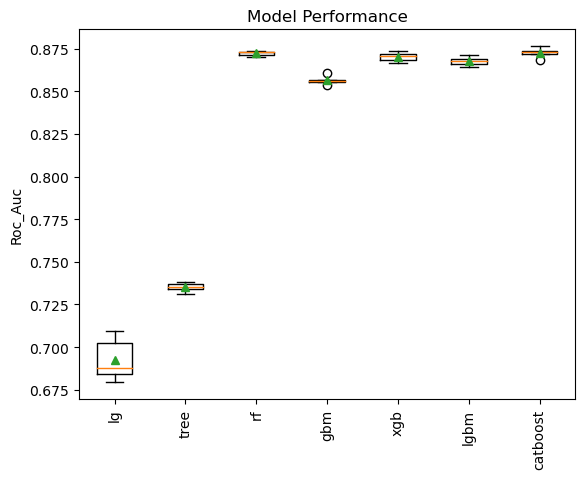

In [137]:
plt.boxplot(results,labels= names , showmeans= True)
plt.xticks(rotation=90)
plt.ylabel("Roc_Auc")
plt.title("Model Performance")
plt.show()

In [138]:
# Lets start with XGBOOST
xgb= XGBClassifier()
kfold= StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_xgb=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict_proba(newtest))

In [139]:
## Generate the predicted values

submission["Outcome"]= pd.DataFrame(np.array(pred_xgb)[0])[1]

submission.to_csv("XGBModel_health.csv",index= False)

## XGB Model


Your private score for this submission is : **0.7636041924268475**

In [140]:
# Lets start with LGBM
lgbm= LGBMClassifier()
kfold= StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_lgbm=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict_proba(newtest))

In [141]:
## Generate the predicted values

submission["Outcome"]= pd.DataFrame(np.array(pred_lgbm)[0])[1]

submission.to_csv("LGBMModel_health.csv",index= False)

## LGBM Model



Your private score for this submission is : **0.773560687928868**

In [142]:
# Lets start with CATBOOST
cboost = CatBoostClassifier()
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

pred_cboost = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_cboost.append(cboost.fit(xtrain, ytrain).predict_proba(newtest))

Learning rate set to 0.059277
0:	learn: 0.6563376	total: 159ms	remaining: 2m 38s
1:	learn: 0.6296695	total: 167ms	remaining: 1m 23s
2:	learn: 0.6023433	total: 179ms	remaining: 59.6s
3:	learn: 0.5773012	total: 191ms	remaining: 47.5s
4:	learn: 0.5575296	total: 202ms	remaining: 40.2s
5:	learn: 0.5404230	total: 214ms	remaining: 35.4s
6:	learn: 0.5252386	total: 229ms	remaining: 32.4s
7:	learn: 0.5117753	total: 241ms	remaining: 29.9s
8:	learn: 0.5013778	total: 253ms	remaining: 27.8s
9:	learn: 0.4908967	total: 264ms	remaining: 26.1s
10:	learn: 0.4822448	total: 275ms	remaining: 24.8s
11:	learn: 0.4745516	total: 286ms	remaining: 23.6s
12:	learn: 0.4680709	total: 298ms	remaining: 22.6s
13:	learn: 0.4625023	total: 310ms	remaining: 21.8s
14:	learn: 0.4570237	total: 322ms	remaining: 21.1s
15:	learn: 0.4521343	total: 332ms	remaining: 20.4s
16:	learn: 0.4479558	total: 342ms	remaining: 19.8s
17:	learn: 0.4446109	total: 352ms	remaining: 19.2s
18:	learn: 0.4415114	total: 363ms	remaining: 18.7s
19:	learn

167:	learn: 0.3936489	total: 2.11s	remaining: 10.5s
168:	learn: 0.3935281	total: 2.12s	remaining: 10.4s
169:	learn: 0.3934573	total: 2.15s	remaining: 10.5s
170:	learn: 0.3932820	total: 2.16s	remaining: 10.5s
171:	learn: 0.3930998	total: 2.18s	remaining: 10.5s
172:	learn: 0.3929723	total: 2.19s	remaining: 10.5s
173:	learn: 0.3928975	total: 2.2s	remaining: 10.5s
174:	learn: 0.3927604	total: 2.21s	remaining: 10.4s
175:	learn: 0.3926421	total: 2.23s	remaining: 10.4s
176:	learn: 0.3925792	total: 2.24s	remaining: 10.4s
177:	learn: 0.3924786	total: 2.25s	remaining: 10.4s
178:	learn: 0.3923457	total: 2.26s	remaining: 10.4s
179:	learn: 0.3922278	total: 2.28s	remaining: 10.4s
180:	learn: 0.3921279	total: 2.29s	remaining: 10.4s
181:	learn: 0.3920669	total: 2.3s	remaining: 10.3s
182:	learn: 0.3919600	total: 2.31s	remaining: 10.3s
183:	learn: 0.3918982	total: 2.33s	remaining: 10.3s
184:	learn: 0.3918007	total: 2.34s	remaining: 10.3s
185:	learn: 0.3917029	total: 2.35s	remaining: 10.3s
186:	learn: 0.

329:	learn: 0.3770155	total: 3.94s	remaining: 8s
330:	learn: 0.3769142	total: 3.95s	remaining: 7.99s
331:	learn: 0.3768244	total: 3.96s	remaining: 7.97s
332:	learn: 0.3768068	total: 3.97s	remaining: 7.96s
333:	learn: 0.3767334	total: 3.98s	remaining: 7.95s
334:	learn: 0.3766500	total: 4s	remaining: 7.93s
335:	learn: 0.3765469	total: 4s	remaining: 7.92s
336:	learn: 0.3764892	total: 4.02s	remaining: 7.9s
337:	learn: 0.3763988	total: 4.03s	remaining: 7.89s
338:	learn: 0.3763557	total: 4.04s	remaining: 7.87s
339:	learn: 0.3762664	total: 4.05s	remaining: 7.86s
340:	learn: 0.3762050	total: 4.06s	remaining: 7.84s
341:	learn: 0.3760510	total: 4.07s	remaining: 7.83s
342:	learn: 0.3760019	total: 4.08s	remaining: 7.81s
343:	learn: 0.3759215	total: 4.09s	remaining: 7.8s
344:	learn: 0.3758362	total: 4.1s	remaining: 7.78s
345:	learn: 0.3757170	total: 4.11s	remaining: 7.77s
346:	learn: 0.3756295	total: 4.12s	remaining: 7.76s
347:	learn: 0.3756019	total: 4.13s	remaining: 7.74s
348:	learn: 0.3755316	to

495:	learn: 0.3649232	total: 5.79s	remaining: 5.88s
496:	learn: 0.3648235	total: 5.8s	remaining: 5.87s
497:	learn: 0.3647454	total: 5.81s	remaining: 5.86s
498:	learn: 0.3646839	total: 5.83s	remaining: 5.85s
499:	learn: 0.3646326	total: 5.84s	remaining: 5.84s
500:	learn: 0.3645798	total: 5.85s	remaining: 5.83s
501:	learn: 0.3644946	total: 5.86s	remaining: 5.82s
502:	learn: 0.3644098	total: 5.88s	remaining: 5.8s
503:	learn: 0.3643347	total: 5.89s	remaining: 5.79s
504:	learn: 0.3642653	total: 5.9s	remaining: 5.78s
505:	learn: 0.3641735	total: 5.91s	remaining: 5.77s
506:	learn: 0.3641154	total: 5.92s	remaining: 5.76s
507:	learn: 0.3640063	total: 5.93s	remaining: 5.74s
508:	learn: 0.3639326	total: 5.94s	remaining: 5.73s
509:	learn: 0.3638614	total: 5.95s	remaining: 5.72s
510:	learn: 0.3638393	total: 5.96s	remaining: 5.71s
511:	learn: 0.3637918	total: 5.98s	remaining: 5.7s
512:	learn: 0.3637261	total: 5.99s	remaining: 5.68s
513:	learn: 0.3636506	total: 6s	remaining: 5.67s
514:	learn: 0.36357

666:	learn: 0.3541222	total: 7.59s	remaining: 3.79s
667:	learn: 0.3540775	total: 7.6s	remaining: 3.78s
668:	learn: 0.3540249	total: 7.61s	remaining: 3.77s
669:	learn: 0.3539610	total: 7.62s	remaining: 3.75s
670:	learn: 0.3538912	total: 7.63s	remaining: 3.74s
671:	learn: 0.3538042	total: 7.64s	remaining: 3.73s
672:	learn: 0.3537558	total: 7.65s	remaining: 3.72s
673:	learn: 0.3536915	total: 7.66s	remaining: 3.71s
674:	learn: 0.3536270	total: 7.68s	remaining: 3.7s
675:	learn: 0.3535885	total: 7.69s	remaining: 3.68s
676:	learn: 0.3535229	total: 7.7s	remaining: 3.67s
677:	learn: 0.3534581	total: 7.71s	remaining: 3.66s
678:	learn: 0.3533986	total: 7.72s	remaining: 3.65s
679:	learn: 0.3533427	total: 7.73s	remaining: 3.64s
680:	learn: 0.3532952	total: 7.74s	remaining: 3.63s
681:	learn: 0.3532663	total: 7.75s	remaining: 3.61s
682:	learn: 0.3532003	total: 7.76s	remaining: 3.6s
683:	learn: 0.3531584	total: 7.77s	remaining: 3.59s
684:	learn: 0.3530905	total: 7.78s	remaining: 3.58s
685:	learn: 0.35

845:	learn: 0.3444727	total: 9.45s	remaining: 1.72s
846:	learn: 0.3444311	total: 9.46s	remaining: 1.71s
847:	learn: 0.3443797	total: 9.47s	remaining: 1.7s
848:	learn: 0.3443396	total: 9.48s	remaining: 1.69s
849:	learn: 0.3443025	total: 9.49s	remaining: 1.68s
850:	learn: 0.3442685	total: 9.5s	remaining: 1.66s
851:	learn: 0.3442026	total: 9.51s	remaining: 1.65s
852:	learn: 0.3441440	total: 9.52s	remaining: 1.64s
853:	learn: 0.3440903	total: 9.53s	remaining: 1.63s
854:	learn: 0.3440300	total: 9.54s	remaining: 1.62s
855:	learn: 0.3439860	total: 9.55s	remaining: 1.61s
856:	learn: 0.3439042	total: 9.56s	remaining: 1.59s
857:	learn: 0.3438472	total: 9.57s	remaining: 1.58s
858:	learn: 0.3438085	total: 9.58s	remaining: 1.57s
859:	learn: 0.3437386	total: 9.59s	remaining: 1.56s
860:	learn: 0.3436842	total: 9.6s	remaining: 1.55s
861:	learn: 0.3436211	total: 9.61s	remaining: 1.54s
862:	learn: 0.3435511	total: 9.62s	remaining: 1.53s
863:	learn: 0.3434880	total: 9.63s	remaining: 1.52s
864:	learn: 0.3

17:	learn: 0.4465288	total: 202ms	remaining: 11s
18:	learn: 0.4432222	total: 216ms	remaining: 11.1s
19:	learn: 0.4407194	total: 227ms	remaining: 11.1s
20:	learn: 0.4381161	total: 239ms	remaining: 11.1s
21:	learn: 0.4365528	total: 250ms	remaining: 11.1s
22:	learn: 0.4346160	total: 260ms	remaining: 11s
23:	learn: 0.4327566	total: 271ms	remaining: 11s
24:	learn: 0.4313718	total: 281ms	remaining: 11s
25:	learn: 0.4299002	total: 291ms	remaining: 10.9s
26:	learn: 0.4286562	total: 301ms	remaining: 10.8s
27:	learn: 0.4275214	total: 312ms	remaining: 10.8s
28:	learn: 0.4265937	total: 321ms	remaining: 10.8s
29:	learn: 0.4254210	total: 333ms	remaining: 10.8s
30:	learn: 0.4247289	total: 343ms	remaining: 10.7s
31:	learn: 0.4235728	total: 353ms	remaining: 10.7s
32:	learn: 0.4227384	total: 362ms	remaining: 10.6s
33:	learn: 0.4219269	total: 376ms	remaining: 10.7s
34:	learn: 0.4213206	total: 387ms	remaining: 10.7s
35:	learn: 0.4206779	total: 397ms	remaining: 10.6s
36:	learn: 0.4201809	total: 407ms	remai

190:	learn: 0.3917017	total: 2.04s	remaining: 8.65s
191:	learn: 0.3915782	total: 2.06s	remaining: 8.65s
192:	learn: 0.3914233	total: 2.07s	remaining: 8.64s
193:	learn: 0.3913489	total: 2.08s	remaining: 8.63s
194:	learn: 0.3912798	total: 2.09s	remaining: 8.61s
195:	learn: 0.3912099	total: 2.1s	remaining: 8.6s
196:	learn: 0.3911479	total: 2.11s	remaining: 8.6s
197:	learn: 0.3910473	total: 2.12s	remaining: 8.59s
198:	learn: 0.3909243	total: 2.13s	remaining: 8.58s
199:	learn: 0.3908310	total: 2.14s	remaining: 8.56s
200:	learn: 0.3907296	total: 2.15s	remaining: 8.55s
201:	learn: 0.3905990	total: 2.16s	remaining: 8.54s
202:	learn: 0.3905389	total: 2.17s	remaining: 8.53s
203:	learn: 0.3904213	total: 2.18s	remaining: 8.52s
204:	learn: 0.3903154	total: 2.19s	remaining: 8.51s
205:	learn: 0.3902013	total: 2.21s	remaining: 8.5s
206:	learn: 0.3901248	total: 2.21s	remaining: 8.49s
207:	learn: 0.3900052	total: 2.23s	remaining: 8.47s
208:	learn: 0.3899081	total: 2.23s	remaining: 8.46s
209:	learn: 0.38

360:	learn: 0.3765033	total: 3.9s	remaining: 6.91s
361:	learn: 0.3764066	total: 3.92s	remaining: 6.9s
362:	learn: 0.3762931	total: 3.93s	remaining: 6.89s
363:	learn: 0.3762118	total: 3.94s	remaining: 6.88s
364:	learn: 0.3761137	total: 3.95s	remaining: 6.87s
365:	learn: 0.3760540	total: 3.96s	remaining: 6.86s
366:	learn: 0.3759691	total: 3.97s	remaining: 6.85s
367:	learn: 0.3758656	total: 3.98s	remaining: 6.83s
368:	learn: 0.3757763	total: 3.99s	remaining: 6.82s
369:	learn: 0.3757421	total: 4s	remaining: 6.81s
370:	learn: 0.3756692	total: 4.01s	remaining: 6.8s
371:	learn: 0.3756012	total: 4.02s	remaining: 6.79s
372:	learn: 0.3755241	total: 4.03s	remaining: 6.78s
373:	learn: 0.3754343	total: 4.04s	remaining: 6.77s
374:	learn: 0.3753528	total: 4.05s	remaining: 6.76s
375:	learn: 0.3753102	total: 4.06s	remaining: 6.75s
376:	learn: 0.3752107	total: 4.07s	remaining: 6.73s
377:	learn: 0.3751337	total: 4.09s	remaining: 6.72s
378:	learn: 0.3750381	total: 4.1s	remaining: 6.72s
379:	learn: 0.37496

523:	learn: 0.3646160	total: 5.73s	remaining: 5.2s
524:	learn: 0.3645349	total: 5.74s	remaining: 5.19s
525:	learn: 0.3644697	total: 5.75s	remaining: 5.18s
526:	learn: 0.3643810	total: 5.76s	remaining: 5.17s
527:	learn: 0.3643403	total: 5.77s	remaining: 5.16s
528:	learn: 0.3643069	total: 5.78s	remaining: 5.15s
529:	learn: 0.3642380	total: 5.79s	remaining: 5.14s
530:	learn: 0.3641568	total: 5.8s	remaining: 5.12s
531:	learn: 0.3640916	total: 5.81s	remaining: 5.11s
532:	learn: 0.3640476	total: 5.82s	remaining: 5.1s
533:	learn: 0.3639877	total: 5.83s	remaining: 5.09s
534:	learn: 0.3639381	total: 5.84s	remaining: 5.08s
535:	learn: 0.3638608	total: 5.86s	remaining: 5.07s
536:	learn: 0.3637321	total: 5.87s	remaining: 5.06s
537:	learn: 0.3636494	total: 5.88s	remaining: 5.05s
538:	learn: 0.3635872	total: 5.89s	remaining: 5.03s
539:	learn: 0.3634911	total: 5.9s	remaining: 5.02s
540:	learn: 0.3634143	total: 5.91s	remaining: 5.01s
541:	learn: 0.3633948	total: 5.92s	remaining: 5s
542:	learn: 0.36330

700:	learn: 0.3533086	total: 7.59s	remaining: 3.24s
701:	learn: 0.3532800	total: 7.6s	remaining: 3.23s
702:	learn: 0.3532091	total: 7.61s	remaining: 3.22s
703:	learn: 0.3531988	total: 7.62s	remaining: 3.21s
704:	learn: 0.3531314	total: 7.63s	remaining: 3.19s
705:	learn: 0.3530590	total: 7.64s	remaining: 3.18s
706:	learn: 0.3530237	total: 7.65s	remaining: 3.17s
707:	learn: 0.3529719	total: 7.66s	remaining: 3.16s
708:	learn: 0.3529125	total: 7.67s	remaining: 3.15s
709:	learn: 0.3528431	total: 7.68s	remaining: 3.14s
710:	learn: 0.3527697	total: 7.69s	remaining: 3.13s
711:	learn: 0.3527025	total: 7.7s	remaining: 3.12s
712:	learn: 0.3526377	total: 7.71s	remaining: 3.1s
713:	learn: 0.3525907	total: 7.72s	remaining: 3.09s
714:	learn: 0.3525390	total: 7.73s	remaining: 3.08s
715:	learn: 0.3524623	total: 7.74s	remaining: 3.07s
716:	learn: 0.3523960	total: 7.75s	remaining: 3.06s
717:	learn: 0.3523319	total: 7.76s	remaining: 3.05s
718:	learn: 0.3523058	total: 7.77s	remaining: 3.04s
719:	learn: 0.3

868:	learn: 0.3443987	total: 9.45s	remaining: 1.42s
869:	learn: 0.3443806	total: 9.46s	remaining: 1.41s
870:	learn: 0.3443472	total: 9.47s	remaining: 1.4s
871:	learn: 0.3443080	total: 9.48s	remaining: 1.39s
872:	learn: 0.3442641	total: 9.49s	remaining: 1.38s
873:	learn: 0.3442014	total: 9.5s	remaining: 1.37s
874:	learn: 0.3441578	total: 9.51s	remaining: 1.36s
875:	learn: 0.3440713	total: 9.52s	remaining: 1.35s
876:	learn: 0.3440469	total: 9.53s	remaining: 1.34s
877:	learn: 0.3439817	total: 9.54s	remaining: 1.33s
878:	learn: 0.3439262	total: 9.55s	remaining: 1.31s
879:	learn: 0.3438714	total: 9.56s	remaining: 1.3s
880:	learn: 0.3438258	total: 9.58s	remaining: 1.29s
881:	learn: 0.3437727	total: 9.59s	remaining: 1.28s
882:	learn: 0.3437007	total: 9.6s	remaining: 1.27s
883:	learn: 0.3436560	total: 9.61s	remaining: 1.26s
884:	learn: 0.3436314	total: 9.62s	remaining: 1.25s
885:	learn: 0.3435783	total: 9.63s	remaining: 1.24s
886:	learn: 0.3435151	total: 9.64s	remaining: 1.23s
887:	learn: 0.34

38:	learn: 0.4193189	total: 476ms	remaining: 11.7s
39:	learn: 0.4187623	total: 487ms	remaining: 11.7s
40:	learn: 0.4182648	total: 498ms	remaining: 11.6s
41:	learn: 0.4177270	total: 512ms	remaining: 11.7s
42:	learn: 0.4173041	total: 523ms	remaining: 11.6s
43:	learn: 0.4170232	total: 533ms	remaining: 11.6s
44:	learn: 0.4166572	total: 544ms	remaining: 11.5s
45:	learn: 0.4162789	total: 554ms	remaining: 11.5s
46:	learn: 0.4160078	total: 565ms	remaining: 11.5s
47:	learn: 0.4156747	total: 576ms	remaining: 11.4s
48:	learn: 0.4154897	total: 586ms	remaining: 11.4s
49:	learn: 0.4150796	total: 596ms	remaining: 11.3s
50:	learn: 0.4147682	total: 610ms	remaining: 11.3s
51:	learn: 0.4145378	total: 623ms	remaining: 11.4s
52:	learn: 0.4142571	total: 634ms	remaining: 11.3s
53:	learn: 0.4138874	total: 645ms	remaining: 11.3s
54:	learn: 0.4135722	total: 657ms	remaining: 11.3s
55:	learn: 0.4133306	total: 669ms	remaining: 11.3s
56:	learn: 0.4131601	total: 681ms	remaining: 11.3s
57:	learn: 0.4129375	total: 693

214:	learn: 0.3898305	total: 2.5s	remaining: 9.13s
215:	learn: 0.3897528	total: 2.51s	remaining: 9.12s
216:	learn: 0.3897072	total: 2.52s	remaining: 9.11s
217:	learn: 0.3896031	total: 2.54s	remaining: 9.1s
218:	learn: 0.3895134	total: 2.54s	remaining: 9.08s
219:	learn: 0.3893971	total: 2.56s	remaining: 9.06s
220:	learn: 0.3893180	total: 2.57s	remaining: 9.05s
221:	learn: 0.3891813	total: 2.58s	remaining: 9.03s
222:	learn: 0.3890446	total: 2.59s	remaining: 9.01s
223:	learn: 0.3890222	total: 2.6s	remaining: 9s
224:	learn: 0.3889842	total: 2.61s	remaining: 8.98s
225:	learn: 0.3888681	total: 2.62s	remaining: 8.97s
226:	learn: 0.3887018	total: 2.63s	remaining: 8.95s
227:	learn: 0.3886493	total: 2.64s	remaining: 8.93s
228:	learn: 0.3885680	total: 2.65s	remaining: 8.93s
229:	learn: 0.3885139	total: 2.66s	remaining: 8.92s
230:	learn: 0.3884563	total: 2.67s	remaining: 8.9s
231:	learn: 0.3882720	total: 2.68s	remaining: 8.89s
232:	learn: 0.3881954	total: 2.69s	remaining: 8.87s
233:	learn: 0.38803

384:	learn: 0.3749731	total: 4.34s	remaining: 6.93s
385:	learn: 0.3748853	total: 4.35s	remaining: 6.92s
386:	learn: 0.3747831	total: 4.36s	remaining: 6.91s
387:	learn: 0.3746948	total: 4.37s	remaining: 6.9s
388:	learn: 0.3746251	total: 4.38s	remaining: 6.88s
389:	learn: 0.3745407	total: 4.39s	remaining: 6.87s
390:	learn: 0.3744547	total: 4.4s	remaining: 6.86s
391:	learn: 0.3743990	total: 4.41s	remaining: 6.85s
392:	learn: 0.3743185	total: 4.42s	remaining: 6.83s
393:	learn: 0.3742518	total: 4.43s	remaining: 6.82s
394:	learn: 0.3741927	total: 4.44s	remaining: 6.81s
395:	learn: 0.3741008	total: 4.46s	remaining: 6.8s
396:	learn: 0.3740382	total: 4.47s	remaining: 6.78s
397:	learn: 0.3739450	total: 4.48s	remaining: 6.77s
398:	learn: 0.3738018	total: 4.49s	remaining: 6.76s
399:	learn: 0.3736988	total: 4.5s	remaining: 6.75s
400:	learn: 0.3736835	total: 4.51s	remaining: 6.74s
401:	learn: 0.3735760	total: 4.52s	remaining: 6.73s
402:	learn: 0.3735029	total: 4.54s	remaining: 6.72s
403:	learn: 0.37

548:	learn: 0.3632370	total: 6.21s	remaining: 5.11s
549:	learn: 0.3631870	total: 6.23s	remaining: 5.09s
550:	learn: 0.3631161	total: 6.24s	remaining: 5.08s
551:	learn: 0.3630425	total: 6.25s	remaining: 5.07s
552:	learn: 0.3629789	total: 6.26s	remaining: 5.06s
553:	learn: 0.3629239	total: 6.27s	remaining: 5.05s
554:	learn: 0.3628771	total: 6.28s	remaining: 5.04s
555:	learn: 0.3628125	total: 6.29s	remaining: 5.02s
556:	learn: 0.3627234	total: 6.3s	remaining: 5.01s
557:	learn: 0.3626647	total: 6.31s	remaining: 5s
558:	learn: 0.3625772	total: 6.32s	remaining: 4.99s
559:	learn: 0.3625364	total: 6.33s	remaining: 4.97s
560:	learn: 0.3624696	total: 6.34s	remaining: 4.96s
561:	learn: 0.3623946	total: 6.35s	remaining: 4.95s
562:	learn: 0.3623257	total: 6.36s	remaining: 4.94s
563:	learn: 0.3622760	total: 6.37s	remaining: 4.93s
564:	learn: 0.3622677	total: 6.38s	remaining: 4.91s
565:	learn: 0.3622006	total: 6.39s	remaining: 4.9s
566:	learn: 0.3621570	total: 6.41s	remaining: 4.89s
567:	learn: 0.362

718:	learn: 0.3532210	total: 8.09s	remaining: 3.16s
719:	learn: 0.3531572	total: 8.1s	remaining: 3.15s
720:	learn: 0.3531180	total: 8.11s	remaining: 3.14s
721:	learn: 0.3530583	total: 8.13s	remaining: 3.13s
722:	learn: 0.3529998	total: 8.14s	remaining: 3.12s
723:	learn: 0.3529097	total: 8.15s	remaining: 3.11s
724:	learn: 0.3528669	total: 8.16s	remaining: 3.09s
725:	learn: 0.3528344	total: 8.17s	remaining: 3.08s
726:	learn: 0.3527980	total: 8.18s	remaining: 3.07s
727:	learn: 0.3527175	total: 8.19s	remaining: 3.06s
728:	learn: 0.3526497	total: 8.2s	remaining: 3.05s
729:	learn: 0.3525809	total: 8.21s	remaining: 3.04s
730:	learn: 0.3525425	total: 8.22s	remaining: 3.02s
731:	learn: 0.3524712	total: 8.23s	remaining: 3.01s
732:	learn: 0.3524161	total: 8.24s	remaining: 3s
733:	learn: 0.3523663	total: 8.26s	remaining: 2.99s
734:	learn: 0.3522997	total: 8.27s	remaining: 2.98s
735:	learn: 0.3522523	total: 8.28s	remaining: 2.97s
736:	learn: 0.3521914	total: 8.29s	remaining: 2.96s
737:	learn: 0.352

878:	learn: 0.3445144	total: 9.95s	remaining: 1.37s
879:	learn: 0.3444491	total: 9.97s	remaining: 1.36s
880:	learn: 0.3443926	total: 9.98s	remaining: 1.35s
881:	learn: 0.3443569	total: 9.99s	remaining: 1.34s
882:	learn: 0.3443060	total: 10s	remaining: 1.32s
883:	learn: 0.3442672	total: 10s	remaining: 1.31s
884:	learn: 0.3442116	total: 10s	remaining: 1.3s
885:	learn: 0.3441670	total: 10s	remaining: 1.29s
886:	learn: 0.3441108	total: 10s	remaining: 1.28s
887:	learn: 0.3440488	total: 10.1s	remaining: 1.27s
888:	learn: 0.3439932	total: 10.1s	remaining: 1.26s
889:	learn: 0.3439651	total: 10.1s	remaining: 1.24s
890:	learn: 0.3439049	total: 10.1s	remaining: 1.23s
891:	learn: 0.3438577	total: 10.1s	remaining: 1.22s
892:	learn: 0.3437923	total: 10.1s	remaining: 1.21s
893:	learn: 0.3437463	total: 10.1s	remaining: 1.2s
894:	learn: 0.3436867	total: 10.1s	remaining: 1.19s
895:	learn: 0.3436518	total: 10.1s	remaining: 1.18s
896:	learn: 0.3436092	total: 10.1s	remaining: 1.16s
897:	learn: 0.3435266	to

43:	learn: 0.4160779	total: 481ms	remaining: 10.4s
44:	learn: 0.4156423	total: 491ms	remaining: 10.4s
45:	learn: 0.4151796	total: 504ms	remaining: 10.4s
46:	learn: 0.4147789	total: 514ms	remaining: 10.4s
47:	learn: 0.4143811	total: 524ms	remaining: 10.4s
48:	learn: 0.4141112	total: 536ms	remaining: 10.4s
49:	learn: 0.4137994	total: 547ms	remaining: 10.4s
50:	learn: 0.4134966	total: 557ms	remaining: 10.4s
51:	learn: 0.4130166	total: 568ms	remaining: 10.3s
52:	learn: 0.4127038	total: 578ms	remaining: 10.3s
53:	learn: 0.4124858	total: 588ms	remaining: 10.3s
54:	learn: 0.4121357	total: 597ms	remaining: 10.3s
55:	learn: 0.4119149	total: 608ms	remaining: 10.3s
56:	learn: 0.4116579	total: 618ms	remaining: 10.2s
57:	learn: 0.4112187	total: 628ms	remaining: 10.2s
58:	learn: 0.4109154	total: 638ms	remaining: 10.2s
59:	learn: 0.4106156	total: 646ms	remaining: 10.1s
60:	learn: 0.4102928	total: 657ms	remaining: 10.1s
61:	learn: 0.4100667	total: 666ms	remaining: 10.1s
62:	learn: 0.4098398	total: 677

218:	learn: 0.3884966	total: 2.54s	remaining: 9.05s
219:	learn: 0.3883780	total: 2.55s	remaining: 9.04s
220:	learn: 0.3882802	total: 2.56s	remaining: 9.02s
221:	learn: 0.3881451	total: 2.57s	remaining: 9.01s
222:	learn: 0.3880077	total: 2.58s	remaining: 8.99s
223:	learn: 0.3878902	total: 2.59s	remaining: 8.98s
224:	learn: 0.3877459	total: 2.6s	remaining: 8.97s
225:	learn: 0.3875608	total: 2.62s	remaining: 8.96s
226:	learn: 0.3874757	total: 2.63s	remaining: 8.95s
227:	learn: 0.3873505	total: 2.64s	remaining: 8.93s
228:	learn: 0.3872152	total: 2.65s	remaining: 8.92s
229:	learn: 0.3871076	total: 2.66s	remaining: 8.9s
230:	learn: 0.3870079	total: 2.67s	remaining: 8.89s
231:	learn: 0.3868964	total: 2.68s	remaining: 8.88s
232:	learn: 0.3867735	total: 2.69s	remaining: 8.86s
233:	learn: 0.3866949	total: 2.7s	remaining: 8.85s
234:	learn: 0.3865650	total: 2.72s	remaining: 8.84s
235:	learn: 0.3864957	total: 2.73s	remaining: 8.83s
236:	learn: 0.3863851	total: 2.74s	remaining: 8.82s
237:	learn: 0.3

381:	learn: 0.3735450	total: 4.36s	remaining: 7.05s
382:	learn: 0.3734397	total: 4.37s	remaining: 7.04s
383:	learn: 0.3733707	total: 4.38s	remaining: 7.03s
384:	learn: 0.3732891	total: 4.39s	remaining: 7.01s
385:	learn: 0.3732319	total: 4.4s	remaining: 7s
386:	learn: 0.3731731	total: 4.41s	remaining: 6.99s
387:	learn: 0.3730549	total: 4.42s	remaining: 6.97s
388:	learn: 0.3729523	total: 4.43s	remaining: 6.96s
389:	learn: 0.3728713	total: 4.44s	remaining: 6.94s
390:	learn: 0.3727929	total: 4.45s	remaining: 6.93s
391:	learn: 0.3727631	total: 4.46s	remaining: 6.92s
392:	learn: 0.3726580	total: 4.47s	remaining: 6.91s
393:	learn: 0.3725250	total: 4.48s	remaining: 6.89s
394:	learn: 0.3724519	total: 4.49s	remaining: 6.88s
395:	learn: 0.3723789	total: 4.5s	remaining: 6.87s
396:	learn: 0.3723064	total: 4.51s	remaining: 6.86s
397:	learn: 0.3722194	total: 4.52s	remaining: 6.84s
398:	learn: 0.3721170	total: 4.53s	remaining: 6.83s
399:	learn: 0.3720317	total: 4.54s	remaining: 6.82s
400:	learn: 0.371

541:	learn: 0.3619161	total: 6.2s	remaining: 5.24s
542:	learn: 0.3618655	total: 6.21s	remaining: 5.22s
543:	learn: 0.3617833	total: 6.22s	remaining: 5.21s
544:	learn: 0.3617486	total: 6.23s	remaining: 5.2s
545:	learn: 0.3616955	total: 6.25s	remaining: 5.19s
546:	learn: 0.3616414	total: 6.26s	remaining: 5.18s
547:	learn: 0.3615759	total: 6.27s	remaining: 5.17s
548:	learn: 0.3615326	total: 6.28s	remaining: 5.16s
549:	learn: 0.3614798	total: 6.29s	remaining: 5.15s
550:	learn: 0.3614318	total: 6.31s	remaining: 5.14s
551:	learn: 0.3613377	total: 6.32s	remaining: 5.13s
552:	learn: 0.3612855	total: 6.33s	remaining: 5.12s
553:	learn: 0.3611870	total: 6.35s	remaining: 5.11s
554:	learn: 0.3611307	total: 6.36s	remaining: 5.1s
555:	learn: 0.3610772	total: 6.37s	remaining: 5.09s
556:	learn: 0.3610042	total: 6.38s	remaining: 5.08s
557:	learn: 0.3609448	total: 6.4s	remaining: 5.07s
558:	learn: 0.3608875	total: 6.41s	remaining: 5.06s
559:	learn: 0.3608370	total: 6.42s	remaining: 5.05s
560:	learn: 0.36

712:	learn: 0.3513817	total: 8.23s	remaining: 3.31s
713:	learn: 0.3513191	total: 8.24s	remaining: 3.3s
714:	learn: 0.3512518	total: 8.25s	remaining: 3.29s
715:	learn: 0.3511924	total: 8.26s	remaining: 3.28s
716:	learn: 0.3511273	total: 8.27s	remaining: 3.27s
717:	learn: 0.3510521	total: 8.28s	remaining: 3.25s
718:	learn: 0.3509712	total: 8.29s	remaining: 3.24s
719:	learn: 0.3509108	total: 8.3s	remaining: 3.23s
720:	learn: 0.3508732	total: 8.31s	remaining: 3.22s
721:	learn: 0.3508141	total: 8.32s	remaining: 3.2s
722:	learn: 0.3507451	total: 8.33s	remaining: 3.19s
723:	learn: 0.3506838	total: 8.34s	remaining: 3.18s
724:	learn: 0.3506396	total: 8.35s	remaining: 3.17s
725:	learn: 0.3505604	total: 8.36s	remaining: 3.16s
726:	learn: 0.3504906	total: 8.37s	remaining: 3.14s
727:	learn: 0.3504341	total: 8.38s	remaining: 3.13s
728:	learn: 0.3503907	total: 8.4s	remaining: 3.12s
729:	learn: 0.3503445	total: 8.41s	remaining: 3.11s
730:	learn: 0.3502793	total: 8.42s	remaining: 3.1s
731:	learn: 0.350

883:	learn: 0.3418391	total: 10.1s	remaining: 1.33s
884:	learn: 0.3417825	total: 10.2s	remaining: 1.32s
885:	learn: 0.3417557	total: 10.2s	remaining: 1.31s
886:	learn: 0.3417043	total: 10.2s	remaining: 1.3s
887:	learn: 0.3416929	total: 10.2s	remaining: 1.28s
888:	learn: 0.3416654	total: 10.2s	remaining: 1.27s
889:	learn: 0.3416316	total: 10.2s	remaining: 1.26s
890:	learn: 0.3415774	total: 10.2s	remaining: 1.25s
891:	learn: 0.3415355	total: 10.2s	remaining: 1.24s
892:	learn: 0.3414868	total: 10.3s	remaining: 1.23s
893:	learn: 0.3414515	total: 10.3s	remaining: 1.22s
894:	learn: 0.3414250	total: 10.3s	remaining: 1.21s
895:	learn: 0.3413387	total: 10.3s	remaining: 1.19s
896:	learn: 0.3412975	total: 10.3s	remaining: 1.18s
897:	learn: 0.3412527	total: 10.3s	remaining: 1.17s
898:	learn: 0.3411873	total: 10.3s	remaining: 1.16s
899:	learn: 0.3411232	total: 10.3s	remaining: 1.15s
900:	learn: 0.3410960	total: 10.3s	remaining: 1.14s
901:	learn: 0.3410364	total: 10.3s	remaining: 1.12s
902:	learn: 0

48:	learn: 0.4127386	total: 591ms	remaining: 11.5s
49:	learn: 0.4124152	total: 603ms	remaining: 11.5s
50:	learn: 0.4121154	total: 615ms	remaining: 11.4s
51:	learn: 0.4117512	total: 626ms	remaining: 11.4s
52:	learn: 0.4114686	total: 637ms	remaining: 11.4s
53:	learn: 0.4112532	total: 648ms	remaining: 11.4s
54:	learn: 0.4110893	total: 658ms	remaining: 11.3s
55:	learn: 0.4108622	total: 670ms	remaining: 11.3s
56:	learn: 0.4105261	total: 680ms	remaining: 11.3s
57:	learn: 0.4102864	total: 691ms	remaining: 11.2s
58:	learn: 0.4099675	total: 702ms	remaining: 11.2s
59:	learn: 0.4096327	total: 712ms	remaining: 11.2s
60:	learn: 0.4092532	total: 723ms	remaining: 11.1s
61:	learn: 0.4089627	total: 734ms	remaining: 11.1s
62:	learn: 0.4087640	total: 745ms	remaining: 11.1s
63:	learn: 0.4085333	total: 757ms	remaining: 11.1s
64:	learn: 0.4081964	total: 769ms	remaining: 11.1s
65:	learn: 0.4079904	total: 779ms	remaining: 11s
66:	learn: 0.4077028	total: 789ms	remaining: 11s
67:	learn: 0.4074944	total: 801ms	r

209:	learn: 0.3882368	total: 2.42s	remaining: 9.12s
210:	learn: 0.3881595	total: 2.44s	remaining: 9.11s
211:	learn: 0.3880539	total: 2.45s	remaining: 9.1s
212:	learn: 0.3879138	total: 2.46s	remaining: 9.09s
213:	learn: 0.3877878	total: 2.47s	remaining: 9.07s
214:	learn: 0.3876601	total: 2.48s	remaining: 9.05s
215:	learn: 0.3875458	total: 2.49s	remaining: 9.04s
216:	learn: 0.3874361	total: 2.51s	remaining: 9.05s
217:	learn: 0.3873104	total: 2.52s	remaining: 9.03s
218:	learn: 0.3871591	total: 2.53s	remaining: 9.02s
219:	learn: 0.3870909	total: 2.54s	remaining: 9s
220:	learn: 0.3869499	total: 2.55s	remaining: 8.99s
221:	learn: 0.3868773	total: 2.56s	remaining: 8.98s
222:	learn: 0.3867417	total: 2.58s	remaining: 8.98s
223:	learn: 0.3866703	total: 2.59s	remaining: 8.97s
224:	learn: 0.3865574	total: 2.6s	remaining: 8.95s
225:	learn: 0.3864508	total: 2.61s	remaining: 8.94s
226:	learn: 0.3863712	total: 2.62s	remaining: 8.92s
227:	learn: 0.3863061	total: 2.63s	remaining: 8.91s
228:	learn: 0.386

384:	learn: 0.3717209	total: 4.46s	remaining: 7.12s
385:	learn: 0.3716771	total: 4.47s	remaining: 7.11s
386:	learn: 0.3716196	total: 4.48s	remaining: 7.1s
387:	learn: 0.3715587	total: 4.49s	remaining: 7.09s
388:	learn: 0.3714806	total: 4.51s	remaining: 7.08s
389:	learn: 0.3714164	total: 4.52s	remaining: 7.06s
390:	learn: 0.3713240	total: 4.53s	remaining: 7.05s
391:	learn: 0.3712725	total: 4.54s	remaining: 7.04s
392:	learn: 0.3711833	total: 4.55s	remaining: 7.03s
393:	learn: 0.3710993	total: 4.56s	remaining: 7.01s
394:	learn: 0.3710410	total: 4.58s	remaining: 7.01s
395:	learn: 0.3709803	total: 4.58s	remaining: 6.99s
396:	learn: 0.3709304	total: 4.59s	remaining: 6.98s
397:	learn: 0.3708913	total: 4.61s	remaining: 6.96s
398:	learn: 0.3708285	total: 4.61s	remaining: 6.95s
399:	learn: 0.3707450	total: 4.63s	remaining: 6.94s
400:	learn: 0.3707152	total: 4.64s	remaining: 6.93s
401:	learn: 0.3706505	total: 4.65s	remaining: 6.92s
402:	learn: 0.3705622	total: 4.66s	remaining: 6.9s
403:	learn: 0.

555:	learn: 0.3599848	total: 6.52s	remaining: 5.21s
556:	learn: 0.3599177	total: 6.53s	remaining: 5.2s
557:	learn: 0.3598353	total: 6.54s	remaining: 5.18s
558:	learn: 0.3597858	total: 6.56s	remaining: 5.17s
559:	learn: 0.3597318	total: 6.57s	remaining: 5.16s
560:	learn: 0.3597003	total: 6.58s	remaining: 5.15s
561:	learn: 0.3596323	total: 6.59s	remaining: 5.13s
562:	learn: 0.3595853	total: 6.6s	remaining: 5.12s
563:	learn: 0.3595400	total: 6.61s	remaining: 5.11s
564:	learn: 0.3594732	total: 6.62s	remaining: 5.1s
565:	learn: 0.3594269	total: 6.63s	remaining: 5.08s
566:	learn: 0.3593402	total: 6.64s	remaining: 5.07s
567:	learn: 0.3592830	total: 6.65s	remaining: 5.06s
568:	learn: 0.3592230	total: 6.67s	remaining: 5.05s
569:	learn: 0.3591547	total: 6.68s	remaining: 5.04s
570:	learn: 0.3591136	total: 6.69s	remaining: 5.03s
571:	learn: 0.3590453	total: 6.7s	remaining: 5.01s
572:	learn: 0.3589894	total: 6.71s	remaining: 5s
573:	learn: 0.3589132	total: 6.72s	remaining: 4.99s
574:	learn: 0.35885

726:	learn: 0.3502214	total: 8.56s	remaining: 3.21s
727:	learn: 0.3501586	total: 8.57s	remaining: 3.2s
728:	learn: 0.3500935	total: 8.58s	remaining: 3.19s
729:	learn: 0.3500491	total: 8.59s	remaining: 3.18s
730:	learn: 0.3499913	total: 8.6s	remaining: 3.17s
731:	learn: 0.3499292	total: 8.61s	remaining: 3.15s
732:	learn: 0.3498620	total: 8.62s	remaining: 3.14s
733:	learn: 0.3498267	total: 8.63s	remaining: 3.13s
734:	learn: 0.3497504	total: 8.64s	remaining: 3.12s
735:	learn: 0.3497039	total: 8.65s	remaining: 3.1s
736:	learn: 0.3496438	total: 8.66s	remaining: 3.09s
737:	learn: 0.3495983	total: 8.67s	remaining: 3.08s
738:	learn: 0.3495274	total: 8.68s	remaining: 3.07s
739:	learn: 0.3494625	total: 8.7s	remaining: 3.06s
740:	learn: 0.3494484	total: 8.71s	remaining: 3.04s
741:	learn: 0.3493889	total: 8.72s	remaining: 3.03s
742:	learn: 0.3493000	total: 8.73s	remaining: 3.02s
743:	learn: 0.3492569	total: 8.74s	remaining: 3.01s
744:	learn: 0.3492215	total: 8.75s	remaining: 2.99s
745:	learn: 0.34

891:	learn: 0.3413649	total: 10.4s	remaining: 1.26s
892:	learn: 0.3413245	total: 10.4s	remaining: 1.25s
893:	learn: 0.3412953	total: 10.5s	remaining: 1.24s
894:	learn: 0.3412377	total: 10.5s	remaining: 1.23s
895:	learn: 0.3412012	total: 10.5s	remaining: 1.22s
896:	learn: 0.3411493	total: 10.5s	remaining: 1.21s
897:	learn: 0.3410896	total: 10.5s	remaining: 1.19s
898:	learn: 0.3410579	total: 10.5s	remaining: 1.18s
899:	learn: 0.3410223	total: 10.5s	remaining: 1.17s
900:	learn: 0.3409532	total: 10.5s	remaining: 1.16s
901:	learn: 0.3408936	total: 10.6s	remaining: 1.15s
902:	learn: 0.3408401	total: 10.6s	remaining: 1.14s
903:	learn: 0.3407845	total: 10.6s	remaining: 1.12s
904:	learn: 0.3407342	total: 10.6s	remaining: 1.11s
905:	learn: 0.3407033	total: 10.6s	remaining: 1.1s
906:	learn: 0.3406587	total: 10.6s	remaining: 1.09s
907:	learn: 0.3406000	total: 10.6s	remaining: 1.08s
908:	learn: 0.3405852	total: 10.6s	remaining: 1.06s
909:	learn: 0.3405255	total: 10.6s	remaining: 1.05s
910:	learn: 0

In [143]:
# Generate the Predicted Values...
submission["Outcome"] = pd.DataFrame(np.array(pred_cboost)[0])[1]

submission.to_csv("CATBOOST_health.csv", index = False)

## CATBOOST MODEL


Your private score for this submission is : **0.7496167272332992**

In [144]:
# Stacking Model
base = [('xgb', XGBClassifier())]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators=base, 
                           final_estimator=LGBMClassifier(), 
                           cv = cv)

pred_stack = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_stack.append(stack.fit(xtrain, ytrain).predict_proba(newtest))

In [145]:
# Generate the Predicted Values...
submission["Outcome"] = pd.DataFrame(np.array(pred_stack)[0])[1]

submission.to_csv("STACK_health.csv", index = False)

## STACKING Model 


Your private score for this submission is : **0.7505536728325723**

### Suggestion:


One can now do parameter tuning of LGBM Classifier model to gain the edge in the performance